## Exploratory Data Analysis


In [2]:
import sys
import os
sys.path.append('../scripts')
from data_loader import *
from EDA import *

1. Data Overview

**Goal:** Understand the structure of the dataset, including the number of rows, columns, and data types.

**Key Steps** Load the data and print a concise summary of the dataset using .info() and .head().

In [3]:
#Load dataset
# path to the CSV file
filename = 'data.csv'
path = os.path.join('..', 'data/raw', filename)

# Load dataset
raw_df = load_data(path)


## Overview of the Data

In [4]:

eda_overview(raw_df)


Dataset Overview:
Number of rows: 95662
Number of columns: 16

Data Types:
TransactionId            object
BatchId                  object
AccountId                object
SubscriptionId           object
CustomerId               object
CurrencyCode             object
CountryCode               int64
ProviderId               object
ProductId                object
ProductCategory          object
ChannelId                object
Amount                  float64
Value                     int64
TransactionStartTime     object
PricingStrategy           int64
FraudResult               int64
dtype: object


## Summary Statistics

In [5]:
stat=descriptive_stat(raw_df)

Summary Statistics:
       CountryCode        Amount         Value  PricingStrategy   FraudResult
count      95662.0  9.566200e+04  9.566200e+04     95662.000000  95662.000000
mean         256.0  6.717846e+03  9.900584e+03         2.255974      0.002018
std            0.0  1.233068e+05  1.231221e+05         0.732924      0.044872
min          256.0 -1.000000e+06  2.000000e+00         0.000000      0.000000
25%          256.0 -5.000000e+01  2.750000e+02         2.000000      0.000000
50%          256.0  1.000000e+03  1.000000e+03         2.000000      0.000000
75%          256.0  2.800000e+03  5.000000e+03         2.000000      0.000000
max          256.0  9.880000e+06  9.880000e+06         4.000000      1.000000


## Distribution of Numerical Features

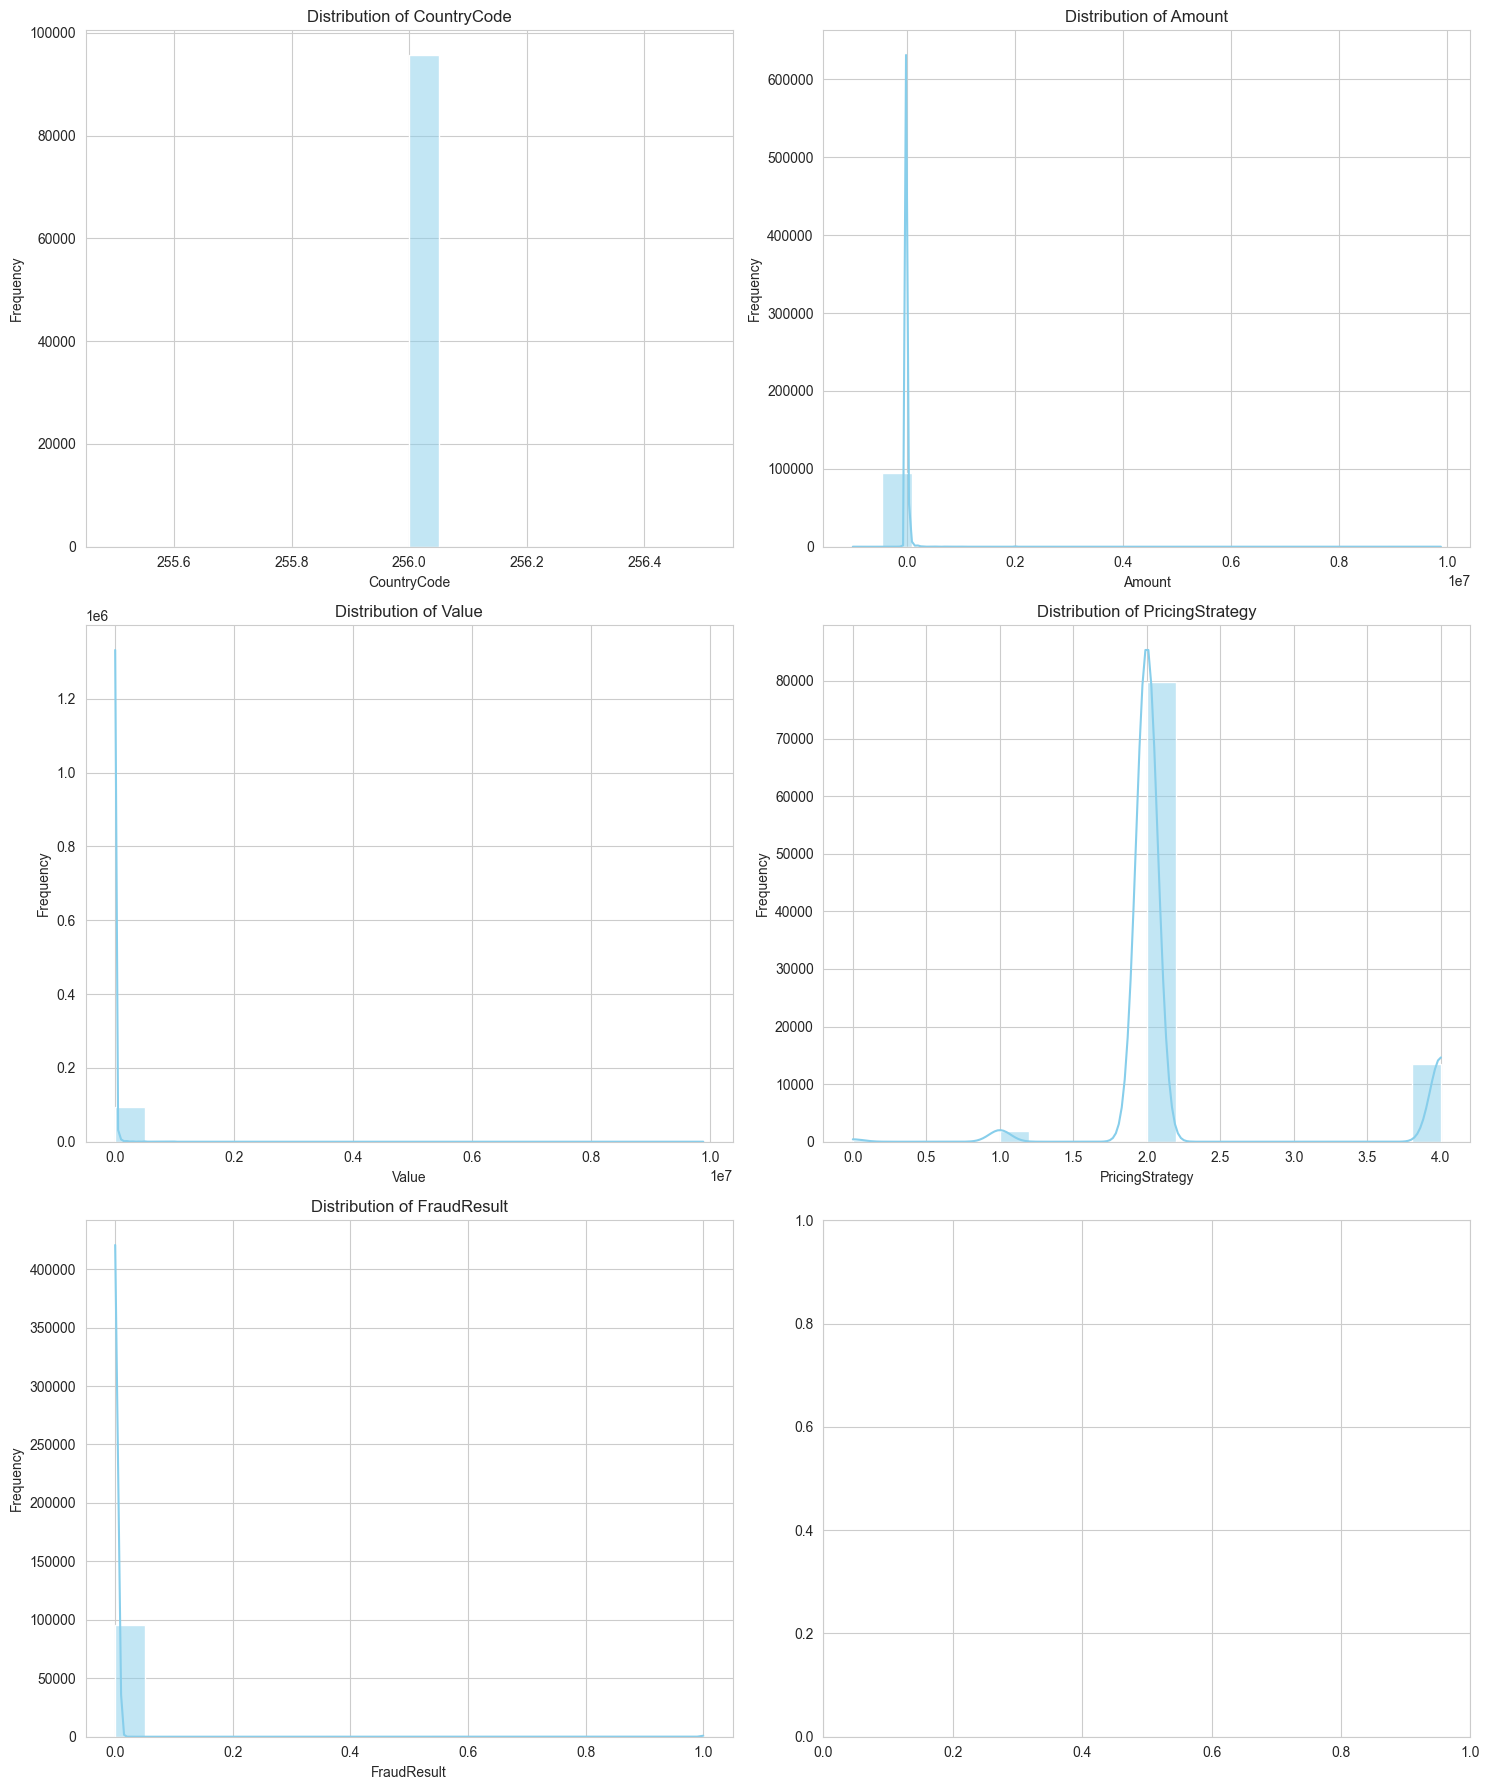

Observations:
CountryCode is approximately symmetric with skewness 0.0.
Amount is right-skewed with skewness 51.098489522819115. This indicates a longer tail on the right side.
Value is right-skewed with skewness 51.29108598736249. This indicates a longer tail on the right side.
PricingStrategy is right-skewed with skewness 1.6590573072757961. This indicates a longer tail on the right side.
FraudResult is right-skewed with skewness 22.196294806589147. This indicates a longer tail on the right side.


In [7]:
visualize_numerical_distribution(raw_df)

## Distribution of Categorical Features

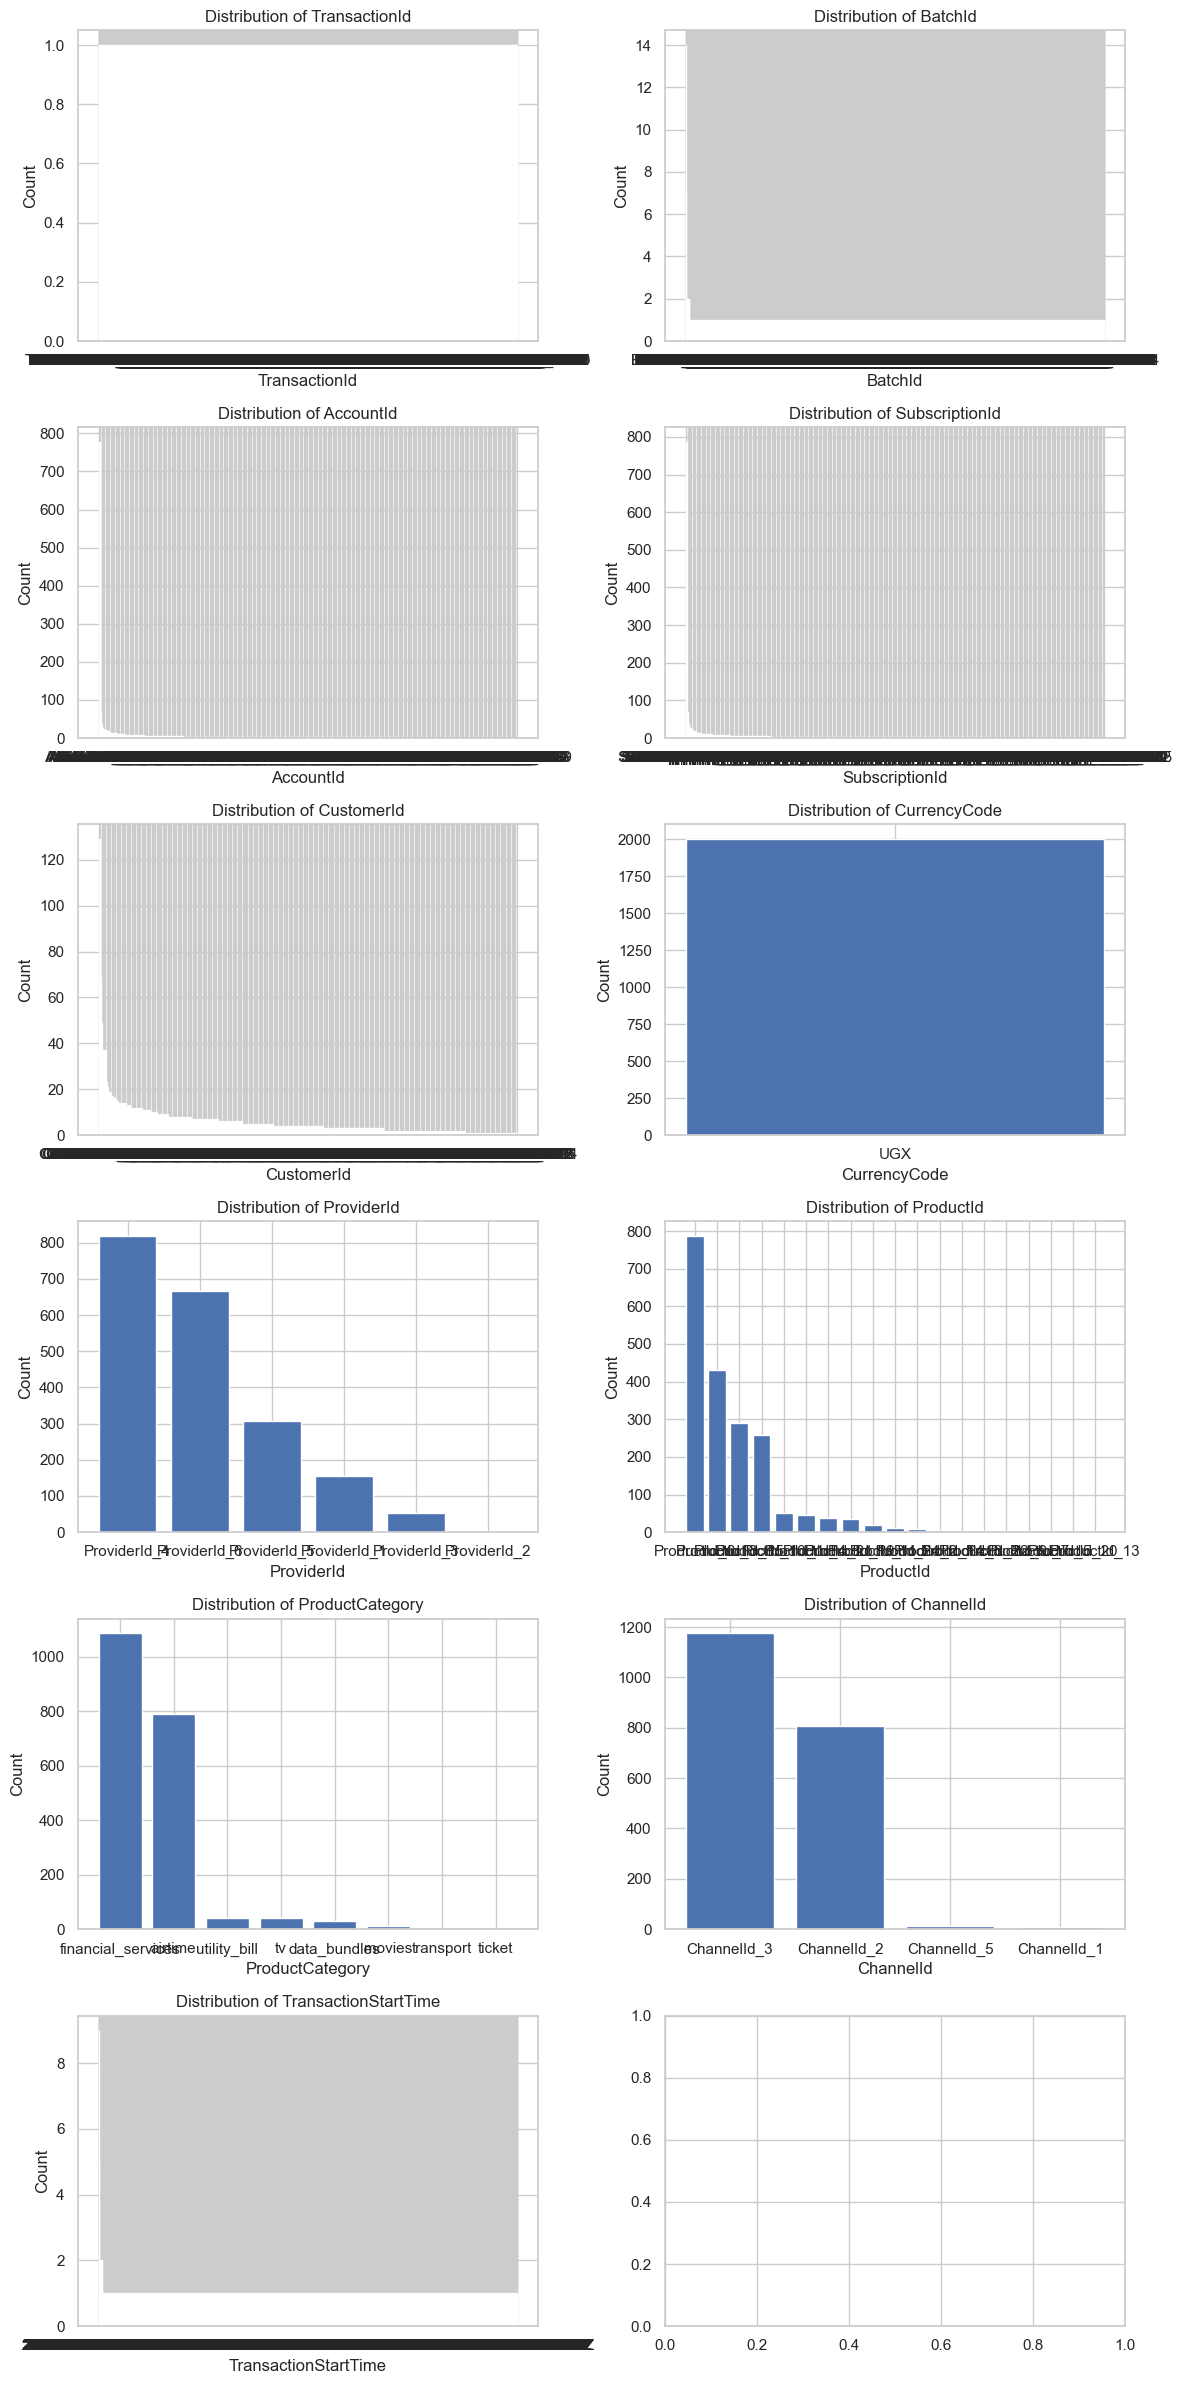

Observations:
TransactionId has 2000 unique categories.
BatchId has 1968 unique categories.
AccountId has 330 unique categories.
SubscriptionId has 329 unique categories.
CustomerId has 336 unique categories.
CurrencyCode has 1 unique categories.
ProviderId has 6 unique categories.
ProductId has 19 unique categories.
ProductCategory has 8 unique categories.
ChannelId has 4 unique categories.
TransactionStartTime has 1975 unique categories.


In [9]:
analyze_categorical_distribution(raw_df)

## Correlation Analysis

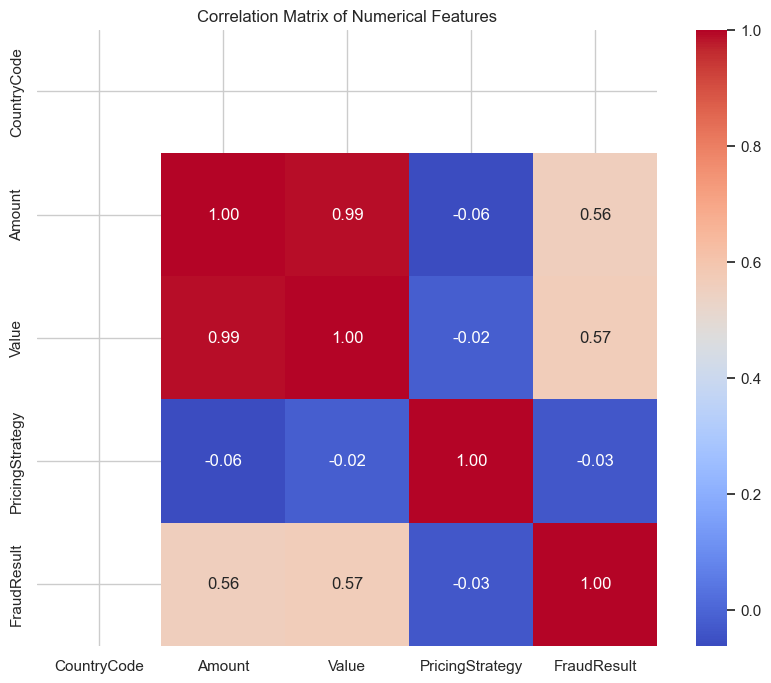

Observations:
There is a very weak or no correlation between 'CountryCode' and 'Amount' (correlation = nan).
There is a very weak or no correlation between 'CountryCode' and 'Value' (correlation = nan).
There is a very weak or no correlation between 'CountryCode' and 'PricingStrategy' (correlation = nan).
There is a very weak or no correlation between 'CountryCode' and 'FraudResult' (correlation = nan).
There is a very weak or no correlation between 'Amount' and 'CountryCode' (correlation = nan).
There is a strong correlation between 'Amount' and 'Value' (correlation = 0.99).
There is a very weak or no correlation between 'Amount' and 'PricingStrategy' (correlation = -0.06).
There is a moderate correlation between 'Amount' and 'FraudResult' (correlation = 0.56).
There is a very weak or no correlation between 'Value' and 'CountryCode' (correlation = nan).
There is a strong correlation between 'Value' and 'Amount' (correlation = 0.99).
There is a very weak or no correlation between 'Valu

d:\c drive files\10Academy\BatiCreditAI\week6venv\Lib\site-packages\numpy\lib\_function_base_impl.py:3045: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
d:\c drive files\10Academy\BatiCreditAI\week6venv\Lib\site-packages\numpy\lib\_function_base_impl.py:3046: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


In [10]:
correlation_analysis(raw_df)

## Identifying Missing Values

In [11]:
identify_missing_values(raw_df)

No missing values found.


In [12]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95662 entries, 0 to 95661
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   TransactionId         95662 non-null  object 
 1   BatchId               95662 non-null  object 
 2   AccountId             95662 non-null  object 
 3   SubscriptionId        95662 non-null  object 
 4   CustomerId            95662 non-null  object 
 5   CurrencyCode          95662 non-null  object 
 6   CountryCode           95662 non-null  int64  
 7   ProviderId            95662 non-null  object 
 8   ProductId             95662 non-null  object 
 9   ProductCategory       95662 non-null  object 
 10  ChannelId             95662 non-null  object 
 11  Amount                95662 non-null  float64
 12  Value                 95662 non-null  int64  
 13  TransactionStartTime  95662 non-null  object 
 14  PricingStrategy       95662 non-null  int64  
 15  FraudResult        

## Outlier Detection

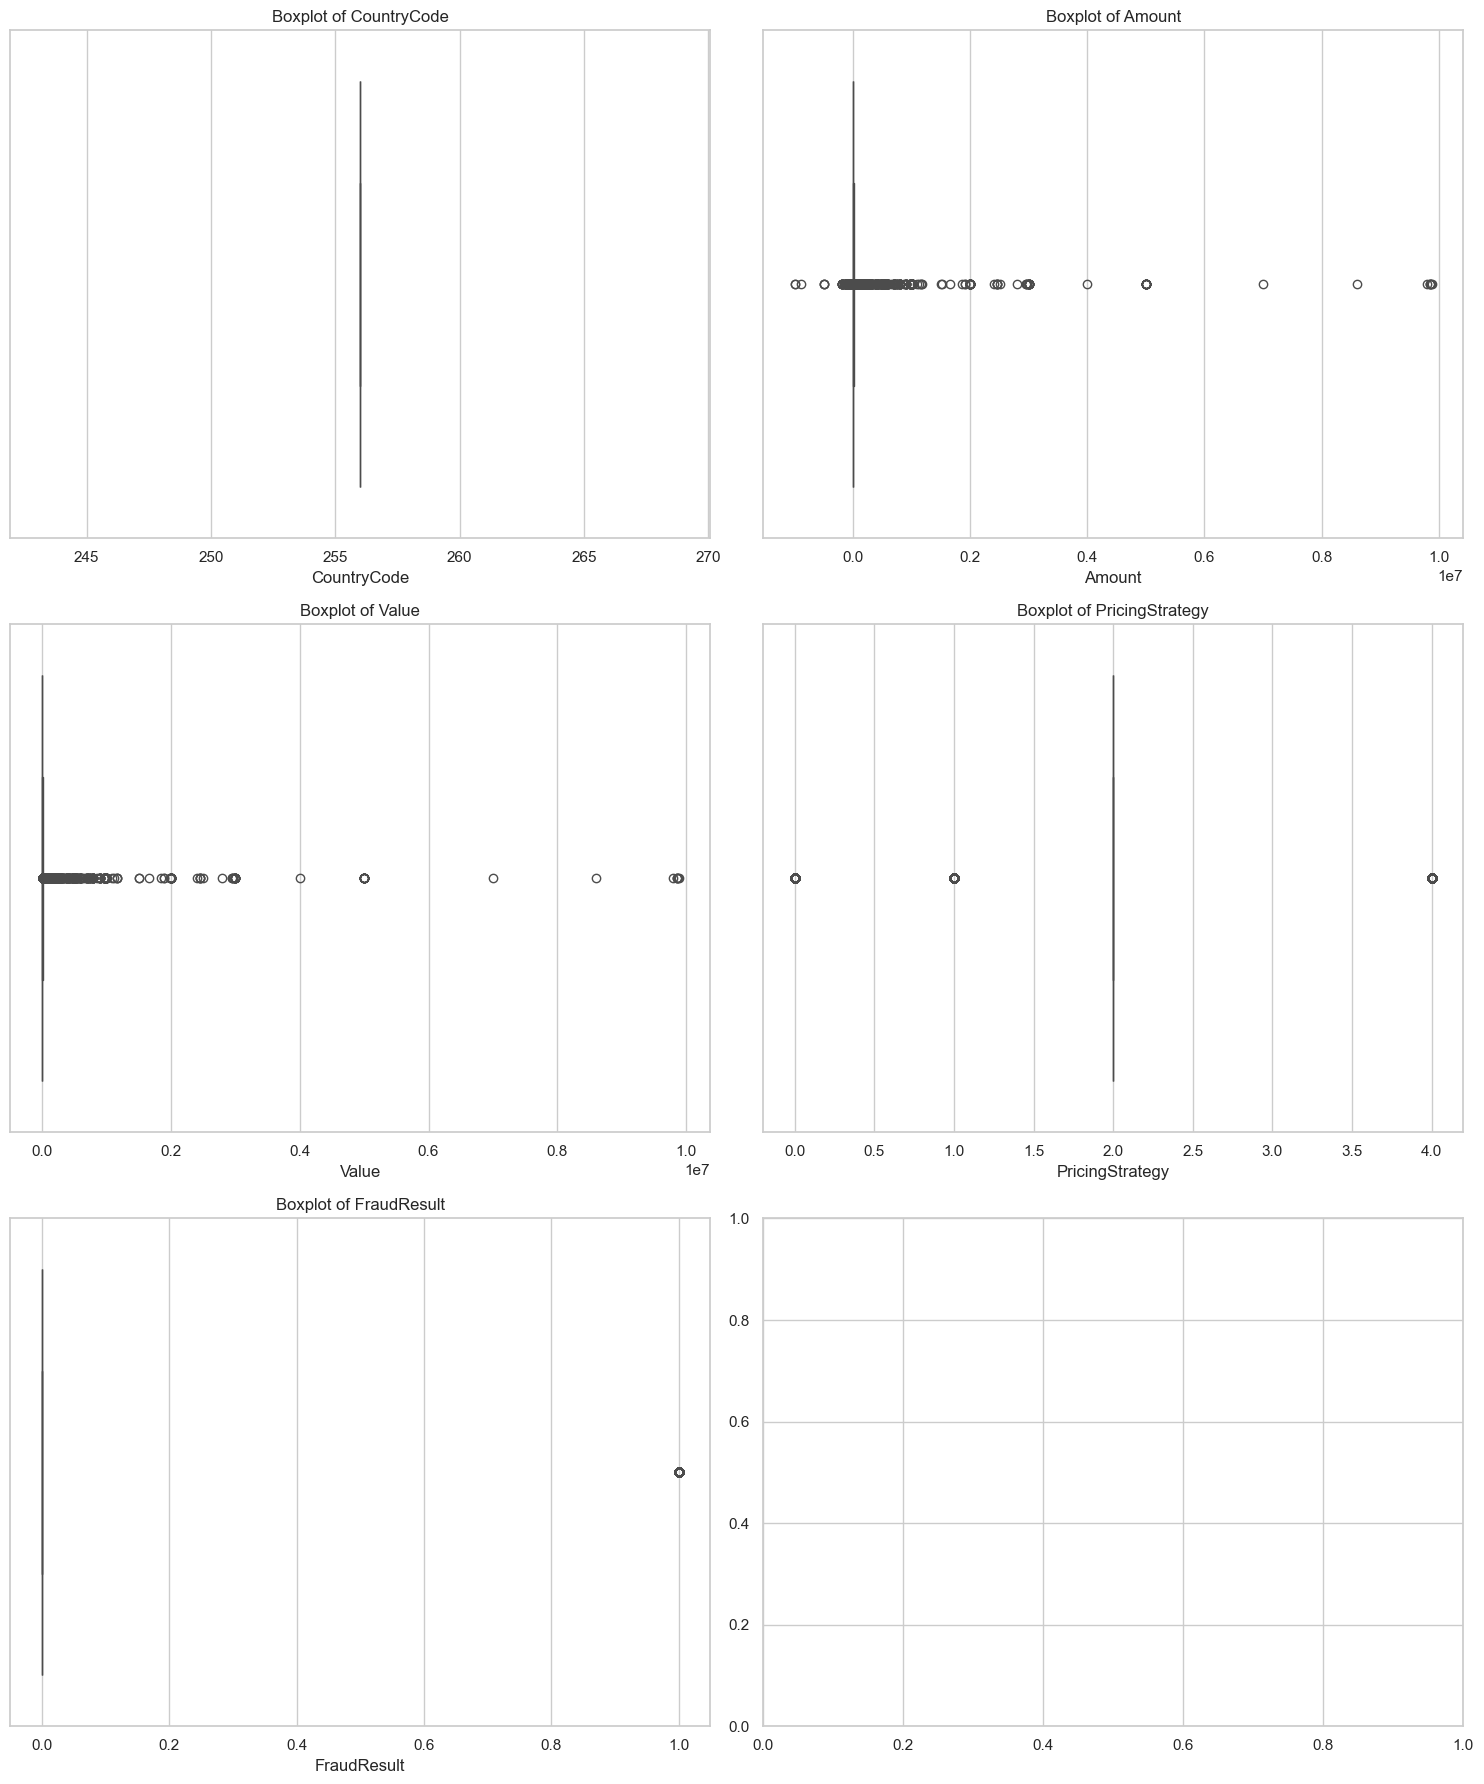


Observations:
No outliers detected in 'CountryCode'.
Detected outliers in 'Amount':
3        20000.0
6        10000.0
32       10000.0
39        8000.0
40        8000.0
          ...   
95633    15000.0
95638    15000.0
95640    15000.0
95643    15000.0
95656    50000.0
Name: Amount, Length: 24441, dtype: float64
Detected outliers in 'Value':
3        21800
52       30000
57       41000
110      17000
114      15000
         ...  
95633    15000
95638    15000
95640    15000
95643    15000
95656    50000
Name: Value, Length: 9021, dtype: int64
Detected outliers in 'PricingStrategy':
6        4
19       4
21       4
46       4
58       1
        ..
95605    4
95610    4
95634    4
95635    4
95645    1
Name: PricingStrategy, Length: 15814, dtype: int64
Detected outliers in 'FraudResult':
131      1
146      1
155      1
2376     1
2452     1
        ..
94805    1
95108    1
95262    1
95264    1
95268    1
Name: FraudResult, Length: 193, dtype: int64


In [13]:
n=detect_outliers(raw_df)